In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
X = np.genfromtxt("X_train.txt",delimiter=',')
Y = np.genfromtxt("Y_train.txt",delimiter=None)

In [56]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

X_new = X[:,:41]
Xtr, Xva, Ytr, Yva = train_test_split(X_new, Y, test_size = 0.25)

In [14]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50
)

classifier.fit(Xtr, Ytr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [15]:
print(metrics.roc_auc_score(Yva, classifier.predict_proba(Xva)[:,1]))

0.7013574818415447


1 AUC: 0.6009876293524792 Val Error: 0.3873922413793104
5 AUC: 0.6773438035760155 Val Error: 0.38415948275862066
10 AUC: 0.6961368895893847 Val Error: 0.3545258620689655
15 AUC: 0.6927922933062743 Val Error: 0.37284482758620685
20 AUC: 0.6986701815438726 Val Error: 0.3679956896551724
25 AUC: 0.6963867899198343 Val Error: 0.36853448275862066
30 AUC: 0.6951988916048599 Val Error: 0.36907327586206895
35 AUC: 0.698784670765032 Val Error: 0.3631465517241379
40 AUC: 0.6990095810624366 Val Error: 0.3620689655172413
45 AUC: 0.7005775603451181 Val Error: 0.3566810344827587
50 AUC: 0.7013574818415447 Val Error: 0.36476293103448276
55 AUC: 0.7031410728046837 Val Error: 0.3566810344827587
60 AUC: 0.7017125727762068 Val Error: 0.3582974137931034
65 AUC: 0.7038390502392651 Val Error: 0.3556034482758621
70 AUC: 0.7041034796586944 Val Error: 0.3561422413793104
75 AUC: 0.7026964826819071 Val Error: 0.35721982758620685
80 AUC: 0.7013446962432426 Val Error: 0.359375
85 AUC: 0.7011151366373645 Val Error: 

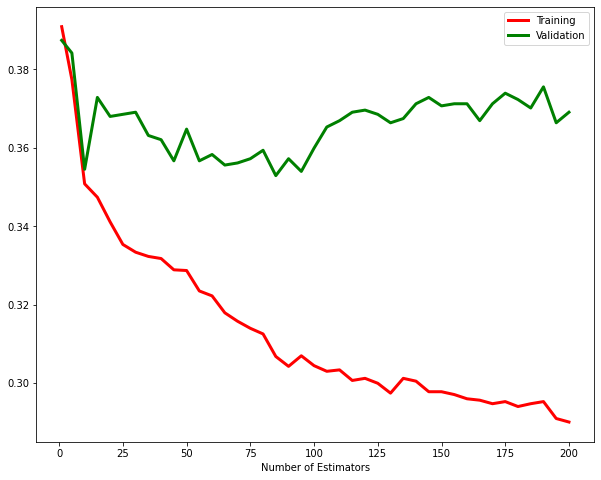

In [18]:
num_estimators = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]
train_errors = []
val_errors = []

for num_estimator in num_estimators:
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=num_estimator
    )
    classifier.fit(Xtr, Ytr)
    train_errors.append(1-classifier.score(Xtr, Ytr))
    val_error = 1-classifier.score(Xva, Yva)
    val_errors.append(val_error)
    print(str(num_estimator) + " " + "AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])) + " Val Error: " + str(val_error))
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(num_estimators, train_errors, 'r-', lw=3, label='Training')
ax.plot(num_estimators, val_errors, 'g-', lw=3, label='Validation')
ax.legend()
plt.xlabel("Number of Estimators")

plt.show()  

In [26]:
Xte = np.genfromtxt('X_test.txt', delimiter=',')[:,:41]


classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=85
)
classifier.fit(X_new, Y)
Yhat = classifier.predict_proba(Xte)[:,1]
Yte = np.vstack((np.arange(Xte.shape[0]), Yhat)).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Predicted',comments='',delimiter=',')

Kaggle Score: 0.62326

85 AUC: 0.7011151366373645 Val Error: 0.35290948275862066
250 AUC: 0.6859055051299309 Val Error: 0.37284482758620685
300 AUC: 0.6829438956323235 Val Error: 0.3787715517241379
350 AUC: 0.684380531950629 Val Error: 0.3787715517241379
400 AUC: 0.6826370412730737 Val Error: 0.3723060344827587
450 AUC: 0.6806413256108319 Val Error: 0.3793103448275862
500 AUC: 0.6829531942492704 Val Error: 0.3701508620689655
550 AUC: 0.6776529825895021 Val Error: 0.3706896551724138
600 AUC: 0.6753876070357985 Val Error: 0.3798491379310345
650 AUC: 0.6749924158155526 Val Error: 0.3798491379310345
700 AUC: 0.6733942160277936 Val Error: 0.3793103448275862
750 AUC: 0.6733093661481524 Val Error: 0.38092672413793105
800 AUC: 0.6717599840993651 Val Error: 0.3830818965517241
850 AUC: 0.6695689974812371 Val Error: 0.3863146551724138
900 AUC: 0.6699688380099564 Val Error: 0.3895474137931034
950 AUC: 0.6695132057795554 Val Error: 0.3830818965517241
1000 AUC: 0.6689355292017254 Val Error: 0.3868534482758621


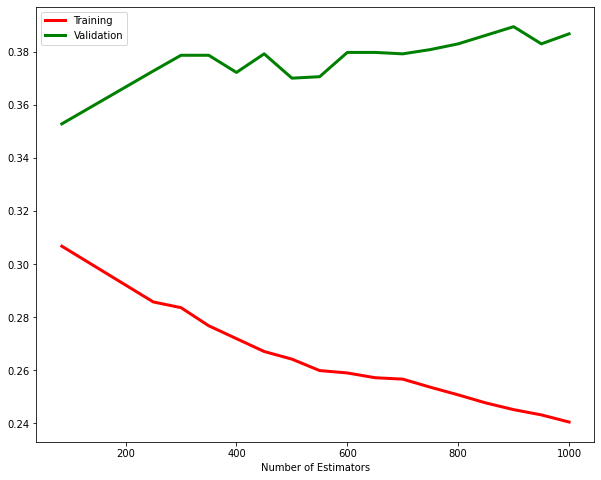

In [27]:
num_estimators = [85,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
train_errors = []
val_errors = []

for num_estimator in num_estimators:
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=num_estimator
    )
    classifier.fit(Xtr, Ytr)
    train_errors.append(1-classifier.score(Xtr, Ytr))
    val_error = 1-classifier.score(Xva, Yva)
    val_errors.append(val_error)
    print(str(num_estimator) + " " + "AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])) + " Val Error: " + str(val_error))
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(num_estimators, train_errors, 'r-', lw=3, label='Training')
ax.plot(num_estimators, val_errors, 'g-', lw=3, label='Validation')
ax.legend()
plt.xlabel("Number of Estimators")

plt.show()  

Seems like when the number of estimators goes up, AdaBoost overfits.

1 AUC: 0.7011151366373645 Val Error: 0.35290948275862066
2 AUC: 0.6500180741866906 Val Error: 0.3857758620689655
3 AUC: 0.6441210075516393 Val Error: 0.38415948275862066
4 AUC: 0.6140887994671892 Val Error: 0.4024784482758621
5 AUC: 0.6105274291765028 Val Error: 0.41594827586206895
6 AUC: 0.6042555120457771 Val Error: 0.4267241379310345
7 AUC: 0.6199690123590244 Val Error: 0.40625
8 AUC: 0.6153383011194372 Val Error: 0.4143318965517241
9 AUC: 0.6326395402763783 Val Error: 0.3981681034482759
10 AUC: 0.6289561256382629 Val Error: 0.3895474137931034
11 AUC: 0.6494212192114075 Val Error: 0.3954741379310345
12 AUC: 0.652502548402207 Val Error: 0.38846982758620685
13 AUC: 0.6612664948747186 Val Error: 0.38146551724137934
14 AUC: 0.6460400096240685 Val Error: 0.39224137931034486
15 AUC: 0.6492794153029664 Val Error: 0.3879310344827587
20 AUC: 0.6562661636114898 Val Error: 0.3954741379310345
25 AUC: 0.66677127610732 Val Error: 0.37338362068965514
30 AUC: 0.5764654329726633 Val Error: 0.4234913

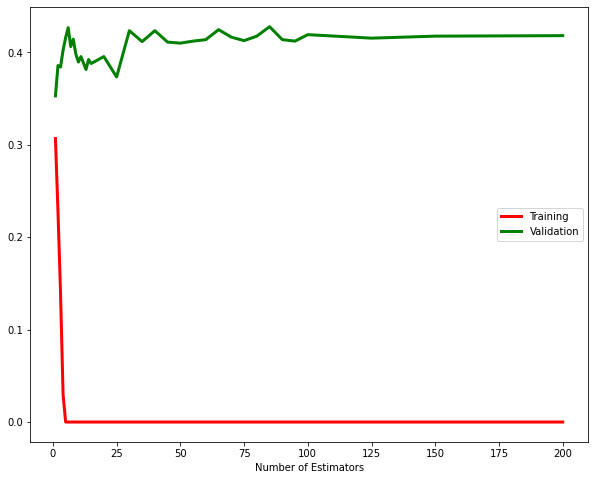

In [30]:
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,125,150,200]
train_errors = []
val_errors = []

for depth in max_depths:
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=depth),
        n_estimators=85
    )
    classifier.fit(Xtr, Ytr)
    train_errors.append(1-classifier.score(Xtr, Ytr))
    val_error = 1-classifier.score(Xva, Yva)
    val_errors.append(val_error)
    print(str(depth) + " " + "AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])) + " Val Error: " + str(val_error))
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(max_depths, train_errors, 'r-', lw=3, label='Training')
ax.plot(max_depths, val_errors, 'g-', lw=3, label='Validation')
ax.legend()
plt.xlabel("Number of Estimators")

plt.show()  

Seems clear we should leave the max_depth at 1.

In [32]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'n_estimators': np.arange(1,126)
}

ab_model = AdaBoostClassifier()

grid_model = GridSearchCV(ab_model, model_params, cv=5)

model = grid_model.fit(X_new, Y)

print(model.best_estimator_.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 49, 'random_state': None}


In [33]:
print(metrics.roc_auc_score(Yva,model.predict_proba(Xva)[:,1]))

0.740611593283144


In [34]:
Xte = np.genfromtxt('X_test.txt', delimiter=',')[:,:41]
Yhat = classifier.predict_proba(Xte)[:,1]
Yte = np.vstack((np.arange(Xte.shape[0]), Yhat)).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Predicted',comments='',delimiter=',')

Kaggle AUC: 0.59560 (messed up here, didn't run on new model generated by grid search)

In [58]:
classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=49
)
classifier.fit(X_new, Y)
Xte = np.genfromtxt('X_test.txt', delimiter=',')[:,:41]
Yhat = classifier.predict_proba(Xte)[:,1]
Yte = np.vstack((np.arange(Xte.shape[0]), Yhat)).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Predicted',comments='',delimiter=',')

Kaggle Score: 0.66904

## Same Processing, but with all features

In [35]:
Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size = 0.25)

1 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
5 AUC: 0.6966504425806751 Val Error: 0.37661637931034486
10 AUC: 0.7250423994610041 Val Error: 0.3480603448275862
15 AUC: 0.7238552145528889 Val Error: 0.35021551724137934
20 AUC: 0.724873382431522 Val Error: 0.34590517241379315
25 AUC: 0.7270531793787608 Val Error: 0.34213362068965514
30 AUC: 0.7272767929744675 Val Error: 0.3448275862068966
35 AUC: 0.7304387472992124 Val Error: 0.34159482758620685
40 AUC: 0.7316636851520573 Val Error: 0.33836206896551724
45 AUC: 0.7322474037590317 Val Error: 0.3394396551724138
50 AUC: 0.7344010640522267 Val Error: 0.3308189655172413
55 AUC: 0.7325401342843203 Val Error: 0.3351293103448276
60 AUC: 0.7339503519736078 Val Error: 0.3442887931034483
65 AUC: 0.7333097135422717 Val Error: 0.3410560344827587
70 AUC: 0.7331168831168831 Val Error: 0.33728448275862066
75 AUC: 0.7321294984085682 Val Error: 0.33836206896551724
80 AUC: 0.7309690309690309 Val Error: 0.33728448275862066
85 AUC: 0.730873777385405

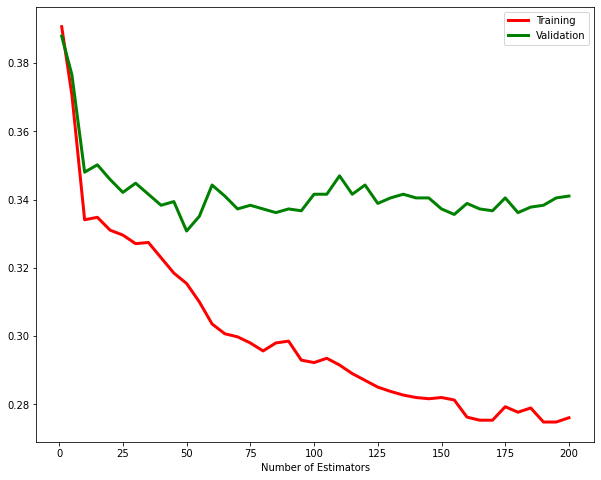

In [36]:
num_estimators = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200]
train_errors = []
val_errors = []

for num_estimator in num_estimators:
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=num_estimator
    )
    classifier.fit(Xtr, Ytr)
    train_errors.append(1-classifier.score(Xtr, Ytr))
    val_error = 1-classifier.score(Xva, Yva)
    val_errors.append(val_error)
    print(str(num_estimator) + " " + "AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])) + " Val Error: " + str(val_error))
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(num_estimators, train_errors, 'r-', lw=3, label='Training')
ax.plot(num_estimators, val_errors, 'g-', lw=3, label='Validation')
ax.legend()
plt.xlabel("Number of Estimators")

plt.show()  

250 AUC: 0.7195978440164487 Val Error: 0.3405172413793104
300 AUC: 0.7216167553376855 Val Error: 0.34159482758620685
350 AUC: 0.7199602722858537 Val Error: 0.3426724137931034
400 AUC: 0.7193782961224822 Val Error: 0.3448275862068966
450 AUC: 0.7181132820667705 Val Error: 0.3410560344827587
500 AUC: 0.714557535487768 Val Error: 0.3475215517241379
550 AUC: 0.7128290314336826 Val Error: 0.3426724137931034
600 AUC: 0.7067049229839928 Val Error: 0.3469827586206896
650 AUC: 0.7024742699161304 Val Error: 0.35290948275862066
700 AUC: 0.7023546221220639 Val Error: 0.3518318965517241
750 AUC: 0.6991682735868783 Val Error: 0.3588362068965517
800 AUC: 0.69821689937969 Val Error: 0.3566810344827587
850 AUC: 0.6955939409427783 Val Error: 0.359375
900 AUC: 0.6958134888367447 Val Error: 0.35775862068965514
950 AUC: 0.6944288269869665 Val Error: 0.3566810344827587
1000 AUC: 0.6908649490044838 Val Error: 0.36476293103448276


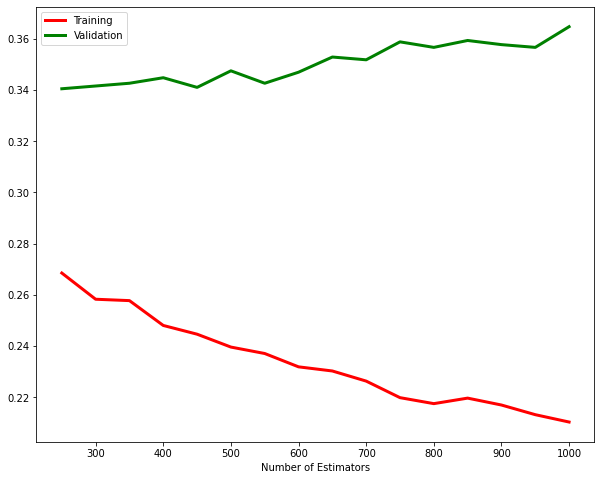

In [37]:
num_estimators = [250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
train_errors = []
val_errors = []

for num_estimator in num_estimators:
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=num_estimator
    )
    classifier.fit(Xtr, Ytr)
    train_errors.append(1-classifier.score(Xtr, Ytr))
    val_error = 1-classifier.score(Xva, Yva)
    val_errors.append(val_error)
    print(str(num_estimator) + " " + "AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])) + " Val Error: " + str(val_error))
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(num_estimators, train_errors, 'r-', lw=3, label='Training')
ax.plot(num_estimators, val_errors, 'g-', lw=3, label='Validation')
ax.legend()
plt.xlabel("Number of Estimators")

plt.show() 

In [38]:
model_params = {
    'n_estimators': np.arange(1,126)
}

ab_model = AdaBoostClassifier()

grid_model = GridSearchCV(ab_model, model_params, cv=5)

model = grid_model.fit(X, Y)

print(model.best_estimator_.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 17, 'random_state': None}


In [39]:
print(metrics.roc_auc_score(Yva,model.predict_proba(Xva)[:,1]))

0.7463507422809748


In [40]:
classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=17
    )
classifier.fit(Xtr, Ytr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=17)

In [41]:
print("Validation Error", 1-classifier.score(Xva, Yva))

Validation Error 0.3448275862068966


In [42]:
print("AUC: ", metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1]))

AUC:  0.7218426921915295


1 AUC: 0.7344010640522267 Val Error: 0.3308189655172413
2 AUC: 0.7035627163534139 Val Error: 0.3599137931034483
3 AUC: 0.6706502799526055 Val Error: 0.3755387931034483
4 AUC: 0.6283472341611875 Val Error: 0.4110991379310345
5 AUC: 0.6264282229398509 Val Error: 0.40409482758620685
6 AUC: 0.6025834630485793 Val Error: 0.4245689655172413
7 AUC: 0.6042074204864902 Val Error: 0.43911637931034486
8 AUC: 0.6169795320958112 Val Error: 0.41540948275862066
9 AUC: 0.6148340032060963 Val Error: 0.41594827586206895
10 AUC: 0.5999907069674512 Val Error: 0.4331896551724138
11 AUC: 0.617357061543108 Val Error: 0.41648706896551724
12 AUC: 0.6240131961062194 Val Error: 0.4110991379310345
13 AUC: 0.6317659085100945 Val Error: 0.4057112068965517
14 AUC: 0.6387194201147689 Val Error: 0.4057112068965517
15 AUC: 0.621978021978022 Val Error: 0.4245689655172413
20 AUC: 0.6454185349534187 Val Error: 0.40032327586206895
25 AUC: 0.6575308412517714 Val Error: 0.3976293103448276
30 AUC: 0.5937434658364892 Val Error

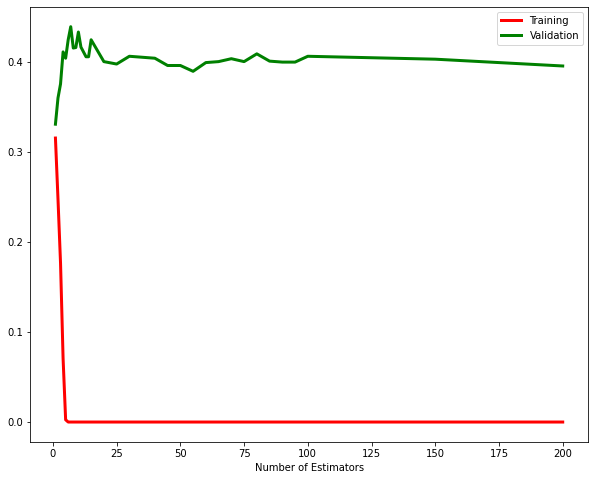

In [43]:
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,125,150,200]
train_errors = []
val_errors = []

for depth in max_depths:
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=depth),
        n_estimators=50
    )
    classifier.fit(Xtr, Ytr)
    train_errors.append(1-classifier.score(Xtr, Ytr))
    val_error = 1-classifier.score(Xva, Yva)
    val_errors.append(val_error)
    print(str(depth) + " " + "AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])) + " Val Error: " + str(val_error))
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(max_depths, train_errors, 'r-', lw=3, label='Training')
ax.plot(max_depths, val_errors, 'g-', lw=3, label='Validation')
ax.legend()
plt.xlabel("Number of Estimators")

plt.show()  

In [44]:
Xte = np.genfromtxt('X_test.txt', delimiter=',')


classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=50
)
classifier.fit(X, Y)
Yhat = classifier.predict_proba(Xte)[:,1]
Yte = np.vstack((np.arange(Xte.shape[0]), Yhat)).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Predicted',comments='',delimiter=',')

Kaggle Score: 0.67080

In [50]:
classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1
)
classifier.fit(Xtr, Ytr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1)

In [51]:
print("AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])))

AUC: 0.7344010640522267


1 AUC: 0.7344010640522267 Val Error: 0.3308189655172413
0.1 AUC: 0.712037962037962 Val Error: 0.3556034482758621
0.01 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
0.001 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
0.0001 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
1e-05 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
1e-06 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
1e-07 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
1e-08 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
1e-09 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
1e-10 AUC: 0.6050437934158864 Val Error: 0.3879310344827587
1e-11 AUC: 0.6050437934158864 Val Error: 0.3879310344827587


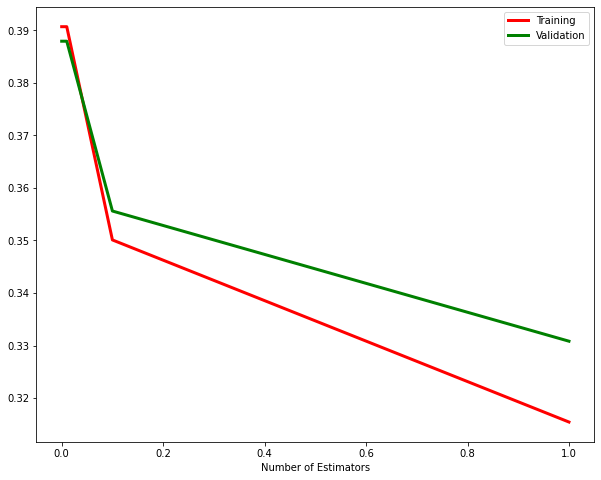

In [52]:
rates = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001]
train_errors = []
val_errors = []

for rate in rates:
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=rate
    )
    classifier.fit(Xtr, Ytr)
    train_errors.append(1-classifier.score(Xtr, Ytr))
    val_error = 1-classifier.score(Xva, Yva)
    val_errors.append(val_error)
    print(str(rate) + " " + "AUC: " + str(metrics.roc_auc_score(Yva,classifier.predict_proba(Xva)[:,1])) + " Val Error: " + str(val_error))
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(rates, train_errors, 'r-', lw=3, label='Training')
ax.plot(rates, val_errors, 'g-', lw=3, label='Validation')
ax.legend()
plt.xlabel("Number of Estimators")

plt.show()  

In [53]:
model_params = {
    'n_estimators': np.arange(1,300),
    'learning_rate': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001]
}

ab_model = AdaBoostClassifier()

grid_model = GridSearchCV(ab_model, model_params, cv=5)

model = grid_model.fit(X, Y)

print(model.best_estimator_.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1, 'n_estimators': 17, 'random_state': None}


In [55]:
Xte = np.genfromtxt('X_test.txt', delimiter=',')


classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=17
)
classifier.fit(X, Y)
Yhat = classifier.predict_proba(Xte)[:,1]
Yte = np.vstack((np.arange(Xte.shape[0]), Yhat)).T
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Predicted',comments='',delimiter=',')

Kaggle Score: 0.72157

Seems like using all the features is helpful.